In [1]:
# Import Libraries
import numpy as np
import pandas as pd

In [2]:
# Read Dataset
df = pd.read_csv('netflix_titles.csv')
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


In [3]:
# Read United States TV Ratings
df = df.dropna()
us = df
us = us[df.country.str.contains('United States',case=False)]
us = us[us.rating.str.contains('TV',case=False)]
us = us.rating.value_counts().reset_index()
us

In [4]:
df = df.dropna()
india = df
india = india[df.country.str.contains('India',case=False)]
india = india[india.rating.str.contains('TV',case=False)]
india = india.rating.value_counts().reset_index()
india['United States'] = us['rating']
india

,index,rating,United States
0,TV-14,399,438
1,TV-MA,183,183
2,TV-PG,131,115
3,TV-Y7,5,32
4,TV-Y7-FV,3,31
5,TV-G,2,17


In [5]:
df = df.dropna()
uk = df
uk = uk[df.country.str.contains('United Kingdom',case=False)]
uk = uk[uk.rating.str.contains('TV',case=False)]
uk = uk.rating.value_counts().reset_index()
india['United Kingdom'] = uk['rating']
india = india.rename(columns={'rating': 'India'})
india

,index,India,United States,United Kingdom
0,TV-14,399,438,86
1,TV-MA,183,183,41
2,TV-PG,131,115,29
3,TV-Y7,5,32,7
4,TV-Y7-FV,3,31,1
5,TV-G,2,17,1


In [6]:
india.set_index('index', inplace = True)

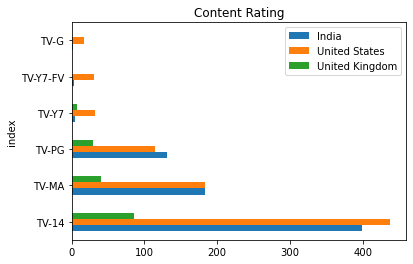

In [7]:
# Plot word
india.plot(kind='barh', title='Content Rating');

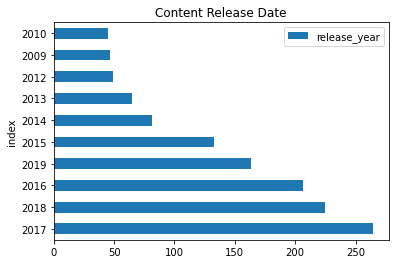

In [8]:
yr = df
yr = yr[df.country.str.contains('United States',case=False)]
yr = yr.sort_values('release_year', ascending=False)
yr = yr.release_year.value_counts().reset_index()
yr = yr.head(10)
# Plot word
yr.set_index('index', inplace = True)
yr.plot(kind='barh', title='Content Release Date');

In [9]:
us = df
us = us[df.country.str.contains('United States',case=False)]
dfType = us.type.value_counts().reset_index()
dfType.set_index('index', inplace = True)
dfType=dfType.transpose().reset_index()
dfType.drop('index',inplace=True,axis=1)
dfType['Region'] = 'United States'

india = df
india = india[df.country.str.contains('India',case=False)]
dfType2 = india.type.value_counts().reset_index()
dfType2.set_index('index', inplace = True)
dfType2=dfType2.transpose().reset_index()
dfType2.drop('index',inplace=True,axis=1)
dfType2['Region'] = 'India'

uk = df
uk = uk[df.country.str.contains('United Kingdom',case=False)]
dfType3 = uk.type.value_counts().reset_index()
dfType3.set_index('index', inplace = True)
dfType3=dfType3.transpose().reset_index()
dfType3.drop('index',inplace=True,axis=1)
dfType3['Region'] = 'United Kingdom'

In [10]:
dfs = pd.concat([dfType, dfType2], axis=0)
dfs = pd.concat([dfs, dfType3], axis=0)
dfs

index,Movie,TV Show,Region
0,1685,33,United States
0,757,5,India
0,323,18,United Kingdom


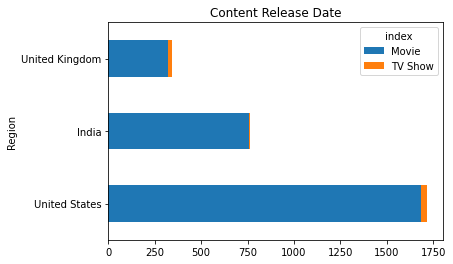

In [11]:
dfs.set_index('Region', inplace = True)
dfs.plot(kind='barh', title='Content Release Date', stacked=True);

In [1]:
# Source For the Dataset:
# https://www.kaggle.com/shivamb/netflix-shows